# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [4]:
# Your code here - load the dataset
import pandas as pd

ames_data = pd.read_csv("ames.csv")

In [5]:
ames_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [56]:
# Your code here
ames_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [32]:
# Your code here - drop columns with missing data
ames_data.dropna(axis='columns')

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [69]:
# Your code here - continuous numeric predictor

ames_data.select_dtypes("number").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

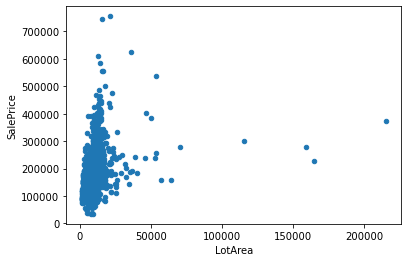

In [70]:
#import matplotlib.pyplot as plt

# Using Pandas built-in plotting functionality
ames_data.plot.scatter(x="LotArea", y="SalePrice")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

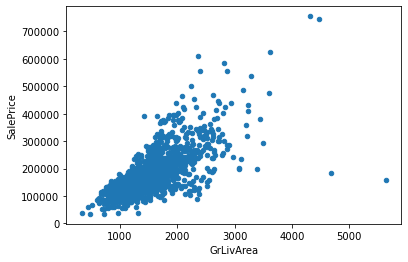

In [40]:
ames_data.plot.scatter(x="GrLivArea", y="SalePrice")

### Discrete Numeric Predictor

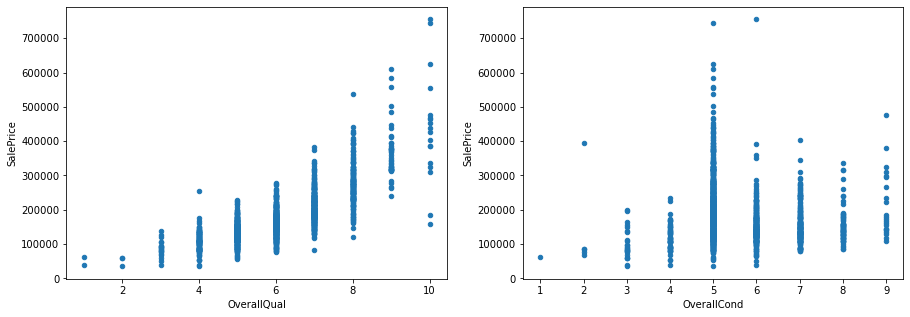

In [49]:
# Your code here - discrete numeric predictor
# 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

ames_data.plot.scatter(x="OverallQual", y="SalePrice", ax=ax1)
ames_data.plot.scatter(x="OverallCond", y="SalePrice", ax=ax2);

### String Categorical Predictor

In [72]:
# Your code here - string categorical predictor
ames_data.select_dtypes("object")

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Gd,Y,Gd,Typ,Y,WD,Normal


In [58]:
ames_data.select_dtypes("object").nunique().sort_values()

Street            2
Utilities         2
CentralAir        2
LandSlope         3
PavedDrive        3
LotShape          4
LandContour       4
KitchenQual       4
ExterQual         4
MSZoning          5
LotConfig         5
BldgType          5
HeatingQC         5
ExterCond         5
Heating           6
Foundation        6
SaleCondition     6
RoofStyle         6
Functional        7
HouseStyle        8
Condition2        8
RoofMatl          8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [73]:
ames_data["LotShape"].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

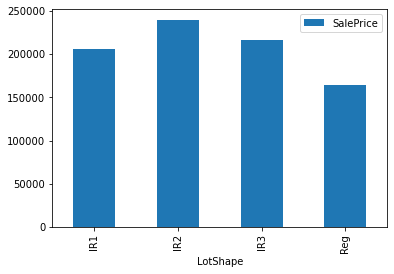

In [74]:
#Plotting  
ames_data.groupby('LotShape').mean('LotShape').sort_index().plot.bar(y='SalePrice');

### Discrete Categorical Predictor

In [68]:
# Your code here - discrete categorical predictor
ames_data.select_dtypes("number").nunique().sort_values()

BsmtHalfBath        3
HalfBath            3
BsmtFullBath        4
Fireplaces          4
FullBath            4
KitchenAbvGr        4
GarageCars          5
YrSold              5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
dtype: int64

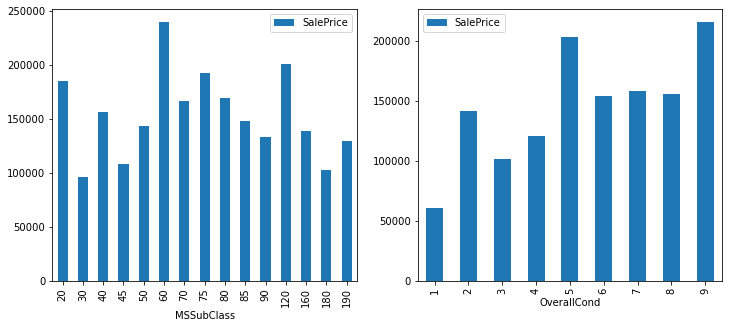

In [107]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ames_data.groupby('MSSubClass').mean('MSSubClass').plot.bar(y='SalePrice', ax=ax1)
ames_data.groupby('OverallCond').mean('OverallCond').plot.bar(y='SalePrice', ax=ax2);

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [83]:
# Your code here - prepare X and y, including one-hot encoding
from sklearn.preprocessing import OneHotEncoder

y= ames_data["SalePrice"]
X= ames_data[["LotArea", "OverallQual", "LotShape"]]

X


,LotArea,OverallQual,LotShape
0,8450,7,Reg
1,9600,6,Reg
2,11250,7,IR1
3,9550,7,IR1
4,14260,8,IR1
...,...,...,...
1455,7917,6,Reg
1456,13175,6,Reg
1457,9042,7,Reg
1458,9717,5,Reg


In [84]:
# Your answer here - which category or categories were dropped?
X = pd.get_dummies(X, columns=["LotShape"], drop_first=True, dtype=int)
X

,LotArea,OverallQual,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,8450,7,0,0,1
1,9600,6,0,0,1
2,11250,7,0,0,0
3,9550,7,0,0,0
4,14260,8,0,0,0
...,...,...,...,...,...
1455,7917,6,0,0,1
1456,13175,6,0,0,1
1457,9042,7,0,0,1
1458,9717,5,0,0,1


In [90]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

Model = sm.OLS(y, sm.add_constant(X))
results = Model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     582.2
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:30:08   Log-Likelihood:                -17742.
No. Observations:                1460   AIC:                         3.550e+04
Df Residuals:                    1454   BIC:                         3.553e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.044e+04   6202.930    -14.581   

The 

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

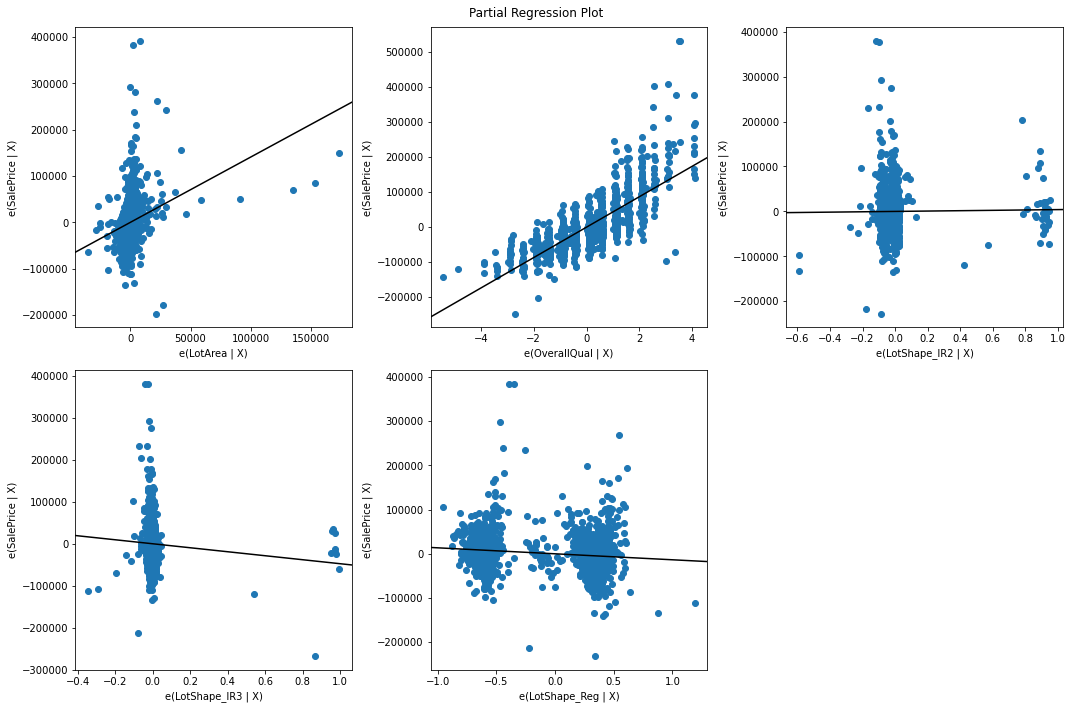

In [93]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(2,3),
    fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [94]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error

y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

31634.97113239499

In [96]:
#RMSE
import numpy as np 

np.sqrt(mean_absolute_error(y, y_pred))

177.86222514180741

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

# Your answer here
The model explains a variance of 67% in `SalePrice` 

When above-grade living area is 0(`const`), overall quality is 0, and lot shape
       is slightly irregular, we would expect a home sale price of -$90k
       
for each 1 increase in overall quality `OverallQual` there is an increase of `Saleprice` of `$44k`

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [108]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [109]:
X_sklearn = ames_data[["LotArea", "OverallQual", "LotShape"]].copy()
X_cat = X_sklearn[["LotShape"]]
X_numeric = X_sklearn.drop("LotShape", axis=1)

ohe = OneHotEncoder(drop="first", sparse=False)
ohe.fit(X_cat)
X_cat_ohe = pd.DataFrame(
    data=ohe.transform(X_cat),
    columns=[f"LotShape_{cat}" for cat in ohe.categories_[0][1:]],
    index=X_cat.index
)
X_cat_ohe

,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1455,0.0,0.0,1.0
1456,0.0,0.0,1.0
1457,0.0,0.0,1.0
1458,0.0,0.0,1.0


In [105]:
# Your code here
X_sklearn_final = pd.concat([X_numeric, X_cat_ohe], axis=1)
X_sklearn_final

,LotArea,OverallQual,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,8450,7,0.0,0.0,1.0
1,9600,6,0.0,0.0,1.0
2,11250,7,0.0,0.0,0.0
3,9550,7,0.0,0.0,0.0
4,14260,8,0.0,0.0,0.0
...,...,...,...,...,...
1455,7917,6,0.0,0.0,1.0
1456,13175,6,0.0,0.0,1.0
1457,9042,7,0.0,0.0,1.0
1458,9717,5,0.0,0.0,1.0


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.